## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [10]:
df = pd.read_csv("data/raw/amz_uk_price_prediction_dataset.csv")
# initial table analysis to get familiar
display(df.head(), f"Table shape: {df.shape}", df.dtypes)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


'Table shape: (2443651, 9)'

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [15]:
# Crosstab between category and isBestSeller
crosstab = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

# Sort by the proportion of best-sellers in descending order
crosstab_sorted = crosstab.sort_values(by=True, ascending=False)

# Display the sorted crosstab
display(crosstab_sorted)

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
"CD, Disc & Tape Players",1.000000,0.000000
General Music-Making Accessories,1.000000,0.000000
Snowboard Boots,1.000000,0.000000


In [17]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Best-seller status depends on the product category.")
else:
    print("Fail to reject the null hypothesis: Best-seller status is independent of the product category.")

Chi-square statistic: 36540.20270061387
P-value: 0.0
Degrees of Freedom: 295
Reject the null hypothesis: Best-seller status depends on the product category.


In [19]:
import numpy as np

def cramers_v(chi2_stat, contingency_table):
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt(chi2_stat / (n * min_dim))

# Calculate Cramér's V
cramers_v_value = cramers_v(chi2_stat, contingency_table)
print(f"Cramér's V: {cramers_v_value}")

# Interpretation of Cramér's V
if cramers_v_value < 0.1:
    print("Very weak association")
elif cramers_v_value < 0.3:
    print("Weak association")
elif cramers_v_value < 0.5:
    print("Moderate association")
else:
    print("Strong association")

Cramér's V: 0.1222829439760564
Weak association


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crosstab between category and isBestSeller
crosstab = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

# Sort by the proportion of best-sellers in descending order
crosstab_sorted = crosstab.sort_values(by=True, ascending=False)

# Get the top 10 categories based on best-seller proportion
top_10_categories = crosstab_sorted.head(10)

# Create the contingency table for the top 10 categories (count data, not normalized)
contingency_table_top_10 = pd.crosstab(df['category'], df['isBestSeller']).loc[top_10_categories.index]
display(contingency_table_top_10)

isBestSeller,False,True
category,,
Grocery,9008,556
Smart Home Security & Lighting,98,6
Health & Personal Care,9017,552
Mobile Phone Accessories,248,11
Power & Hand Tools,8353,306
"Billiard, Snooker & Pool",241,8
Pet Supplies,9152,285
Home Brewing & Wine Making,239,7
Wind Instruments,243,7


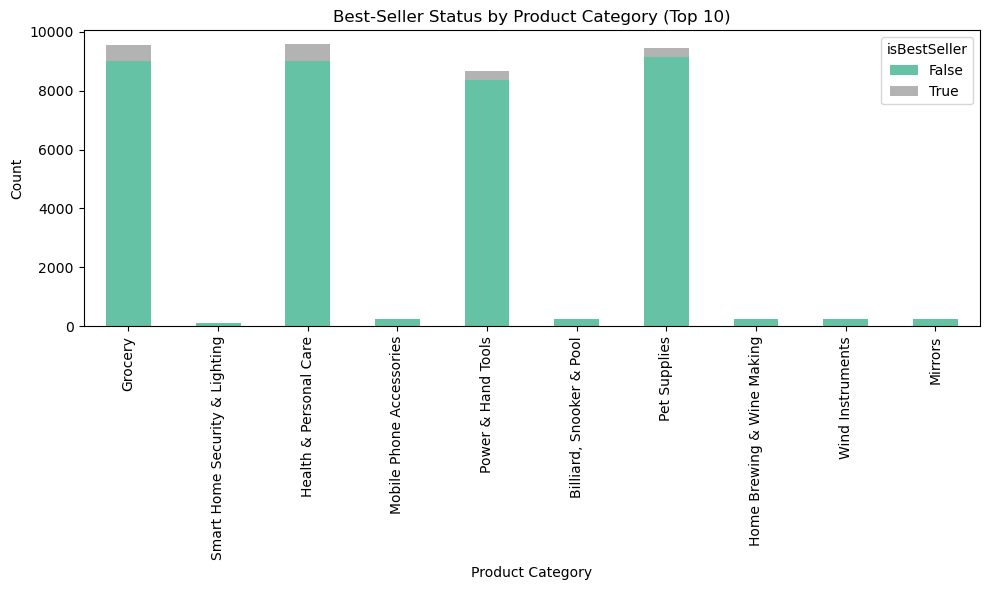

In [27]:
# Plot the stacked bar chart for the top 10 categories
contingency_table_top_10.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Add titles and labels
plt.title('Best-Seller Status by Product Category (Top 10)')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

---

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [31]:
# Calculate the IQR (Interquartile Range) for the 'price' column
Q1 = df['price'].quantile(0.25)  # First quartile
Q3 = df['price'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile Range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers in price
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Dataframe without outliers shape: {df_no_outliers.shape}")

Dataframe without outliers shape: (2115963, 9)


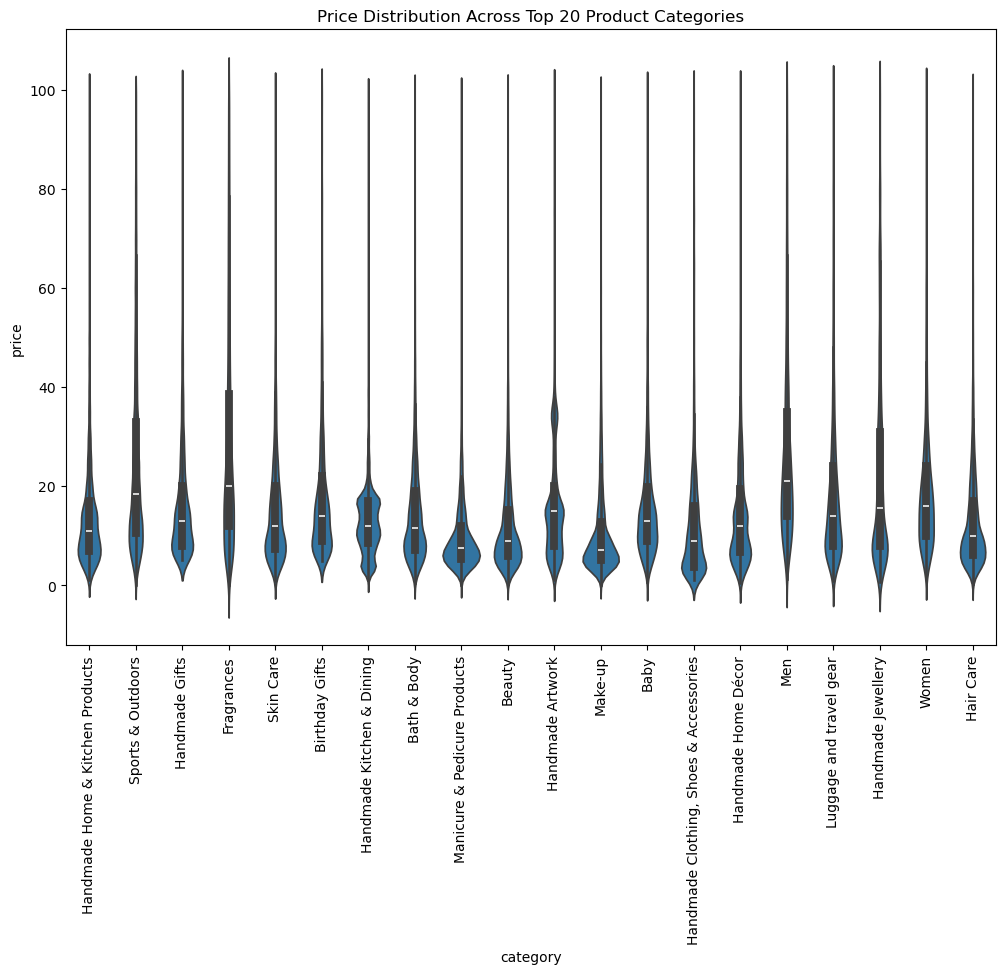

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 20 categories based on count
top_20_categories = df_no_outliers['category'].value_counts().head(20).index

# Filter the dataframe for the top 20 categories
df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

# Create a violin plot to visualize the price distribution across categories
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_top_20)
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xticks(rotation=90)
plt.show()

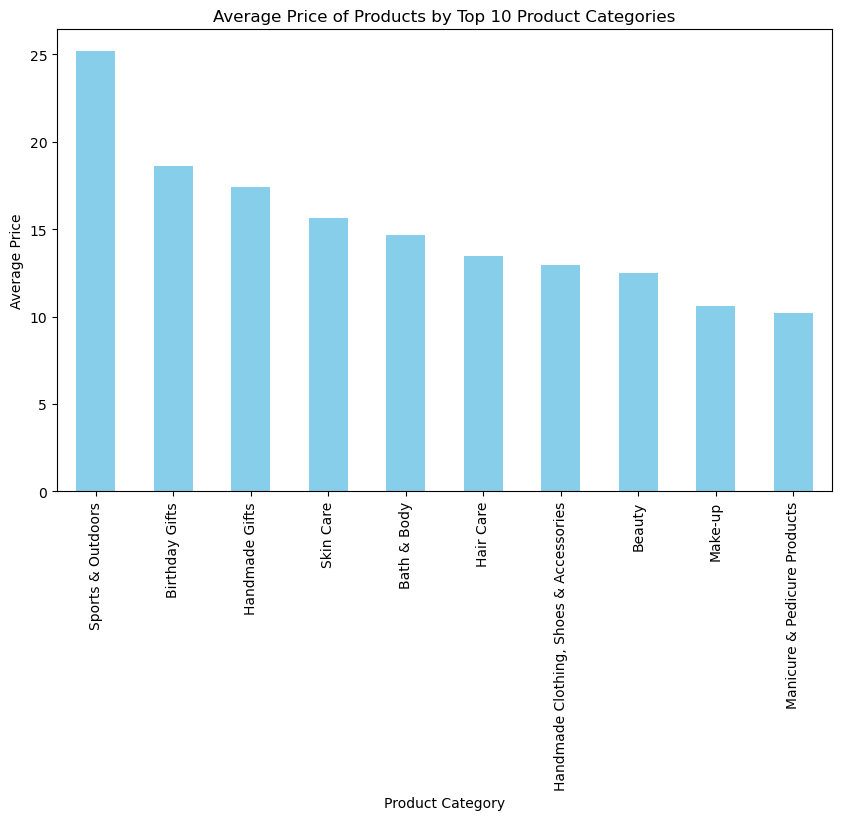

In [35]:
# Get the top 10 categories based on count
top_10_categories = df_no_outliers['category'].value_counts().head(10).index

# Filter the dataframe for the top 10 categories
df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Group by category and calculate the average price
avg_price_by_category = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

# Create the bar chart for average price by category
plt.figure(figsize=(10, 6))
avg_price_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Price of Products by Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

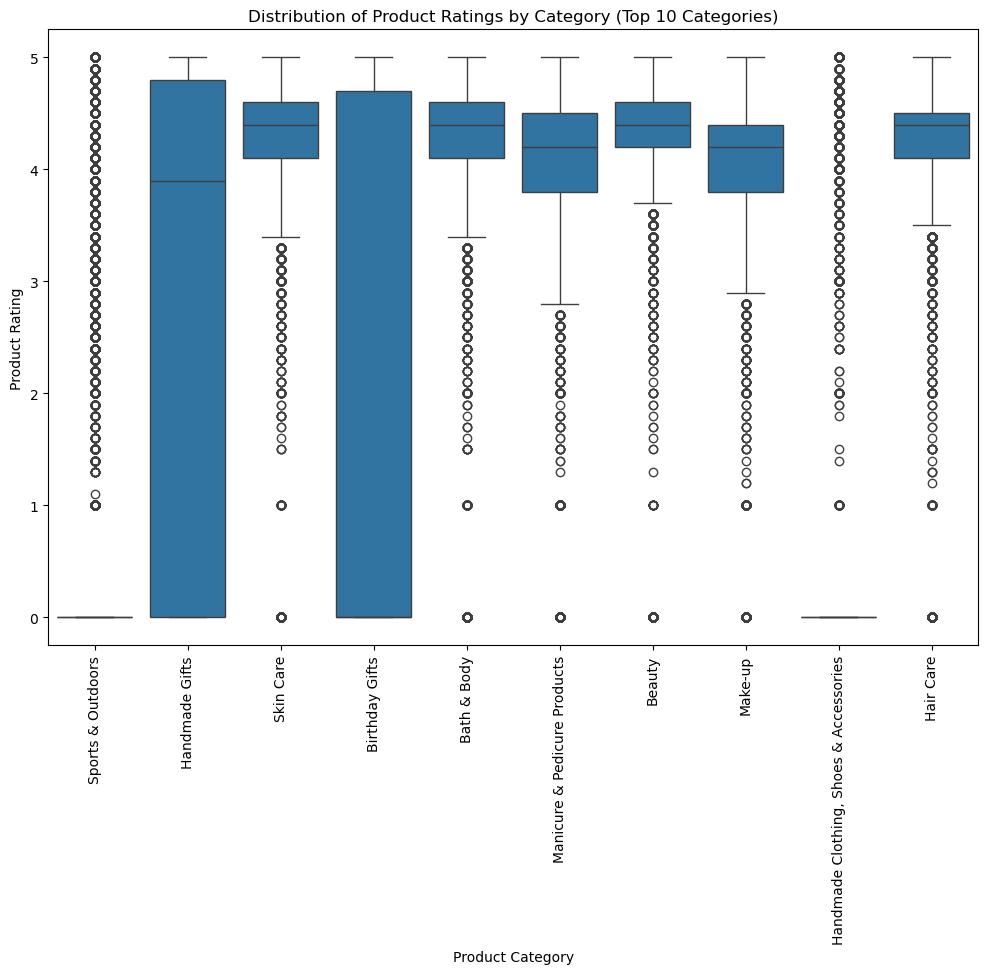

In [37]:
# Filter the dataframe for the top 10 categories based on count
df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Create side-by-side box plots for ratings across categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_top_10)
plt.title('Distribution of Product Ratings by Category (Top 10 Categories)')
plt.xlabel('Product Category')
plt.ylabel('Product Rating')
plt.xticks(rotation=90)
plt.show()

---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

In [39]:
# Calculate the Pearson correlation coefficient between price and stars
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])
print(f"Correlation coefficient between price and stars: {correlation}")

Correlation coefficient between price and stars: -0.07767299878181444


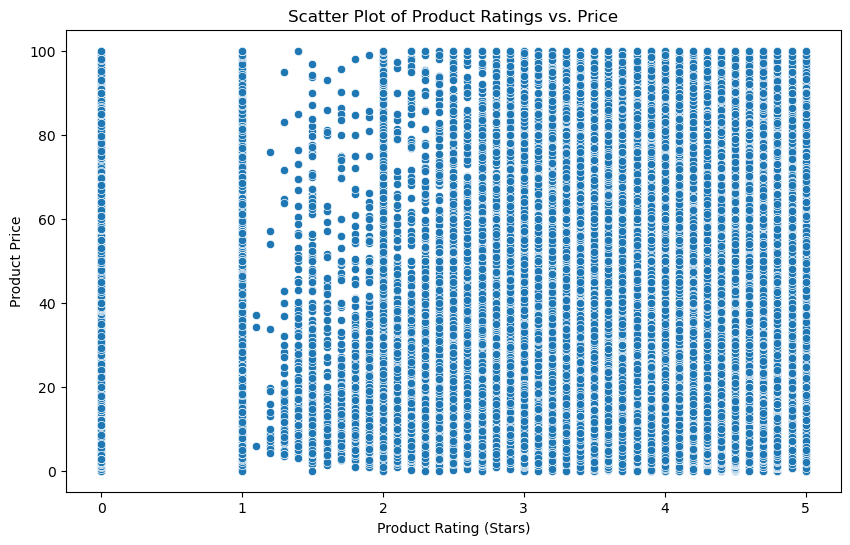

In [41]:
# Scatter plot for price vs. stars
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=df_no_outliers)
plt.title('Scatter Plot of Product Ratings vs. Price')
plt.xlabel('Product Rating (Stars)')
plt.ylabel('Product Price')
plt.show()

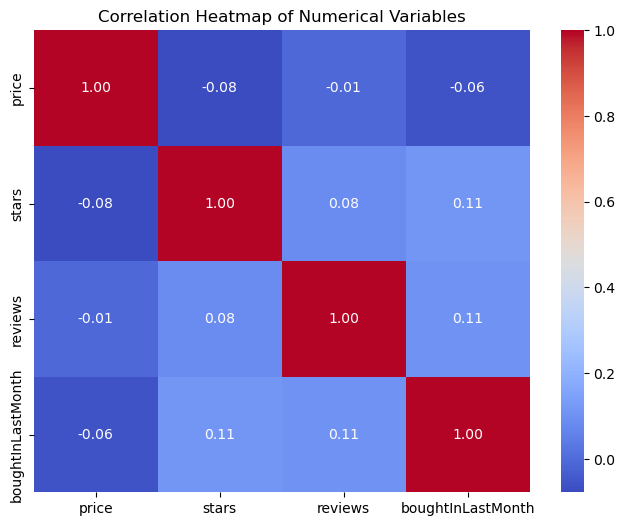

In [43]:
# Create a correlation matrix of all numerical columns
correlation_matrix = df_no_outliers[['price', 'stars', 'reviews', 'boughtInLastMonth']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

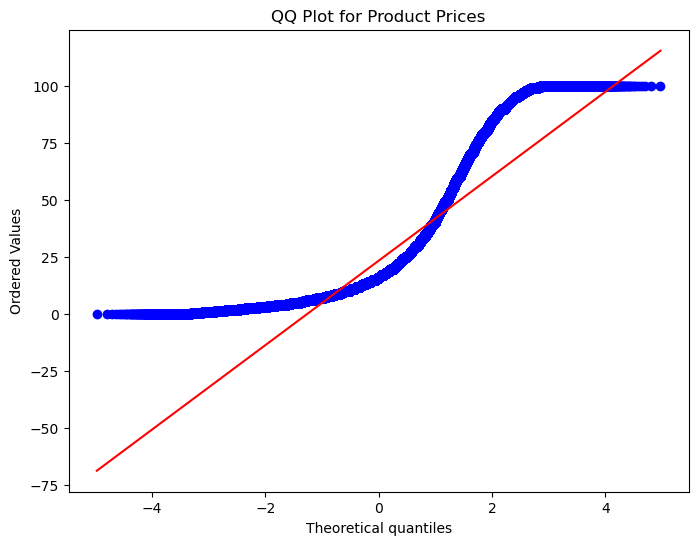

In [45]:
import scipy.stats as stats

# QQ plot for price
plt.figure(figsize=(8, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.show()